In [1]:
import numpy as np
import scipy
import sklearn

From the article : Chakravarti-IsotonicMedianRegression

In [2]:
import bisect

def fusion(ens1, ens2):
    # Créer une copie de ens1 pour la fusion
    merged = ens1[:]

    # Parcourir chaque élément de ens2
    for element in ens2:
        # Utiliser bisect pour insérer l'élément à sa place correcte dans merged
        bisect.insort(merged, element)

    return merged

def median(ens):
  "Sorted list ens"
  length = len(ens)

  if length % 2 == 1 :
    return ens[length//2]

  else :
    return (ens[length//2 - 1] + ens[length//2])/2



In [3]:
# Classe pour représenter un nœud dans une liste doublement chaînée
class Node:
    def __init__(self, data=None):
        self.data = data  # Les données du nœud
        self.next = None  # Référence au prochain nœud
        self.prev = None  # Référence au nœud précédent

# Classe pour représenter la liste doublement chaînée
class DoublyLinkedList:
    def __init__(self):
        self.head = None  # La tête de la liste (premier nœud)
        self.tail = None  # La queue de la liste (dernier nœud)

    # Fonction pour ajouter un élément à la fin de la liste
    def append(self, data):
        new_node = Node(data)  # Créer un nouveau nœud
        if not self.head:  # Si la liste est vide
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node  # Lier l'ancien dernier nœud au nouveau
            new_node.prev = self.tail  # Lier le nouveau nœud à l'ancien dernier
            self.tail = new_node  # Mettre à jour la queue

    # Fonction pour afficher la liste de la tête à la queue
    def print_forward(self):
        current = self.head
        while current:
            print(current.data, end=" -> " if current.next else "\n")
            current = current.next

    # Fonction pour afficher la liste de la queue à la tête
    def print_backward(self):
        current = self.tail
        while current:
            print(current.data, end=" <- " if current.prev else "\n")
            current = current.prev

# Fonction pour convertir une liste classique en une liste doublement chaînée
def list_to_doubly_linkedlist(S):
    dll = DoublyLinkedList()
    if not S :
      return dll
    dll.append(S[0])
    cur = dll.head

    for i in range(1,len(S)):
      element = Node(S[i])
      cur.next = element
      element.prev = cur
      cur = element
    dll.tail = element
    return dll

In [4]:
# Exemple d'utilisation
S = [1, 2, 3, 4, 5]  # Liste classique
dll = list_to_doubly_linkedlist(S)  # Convertir en liste doublement chaînée

# Afficher la liste dans les deux sens
dll.print_forward()   # Sortie : 1 -> 2 -> 3 -> 4 -> 5
dll.print_backward()  # Sortie : 5 <- 4 <- 3 <- 2 <- 1

1 -> 2 -> 3 -> 4 -> 5
5 <- 4 <- 3 <- 2 <- 1


In [5]:
def median_isotonique_regression(S: list[list]):
    number_of_sets = len(S)
    # Tri des ensembles dans S
    for s in S:
        s.sort()

    # Conversion de S en une liste doublement chaînée
    dll = list_to_doubly_linkedlist(S)

    # Initialisation
    past, cur = None, dll.head
    ans, visited_count = [], 1

    # Étape 1
    while cur and cur.next:
        #print(ans)

        futur = cur.next
        M_B_cur, M_B_futur = median(cur.data), median(futur.data)
        # cur = B+ je le decouvre
        visited_count += 1
        if M_B_cur <= M_B_futur:
            ans.append(M_B_cur)
            past, cur = cur, cur.next

        else:
            # Fusion des données de cur et futur
            merged = Node(fusion(cur.data, futur.data))

            futur_next = futur.next

            if futur_next:
                futur_next.prev = merged

            merged.prev = past
            merged.next = futur_next

            if past:
                past.next = merged

            past, cur, futur = past, merged, futur_next

            x = median(cur.data)
            past_visited_count = 0

            while past and median(past.data) > median(cur.data):
                past_visited_count += 1
                n_merged = Node(fusion(cur.data, past.data))
                before_past = past.prev

                if before_past:
                    before_past.next = n_merged

                n_merged.prev, n_merged.next = before_past, futur

                if futur:
                    futur.prev = n_merged

                past, cur, futur = before_past, n_merged, futur
                x = median(cur.data)

            length = visited_count-past_visited_count
            #print(visited_count,past_visited_count)
            ans = ans[:-length]
            ans.extend([x]*length)
            if cur.next and median(cur.data) <= median(cur.next.data):
              past, cur = cur, cur.next


    # On ajoute la dernière médiane
    if cur and len(ans)<number_of_sets :
      ans.append(median(cur.data))

    return ans


In [6]:
#S = [[5], [4], [6], [7], [10]]
S = [[10],[9]]
test = median_isotonique_regression(S)
test

[9.5, 9.5]

Original y values: [ 5.76  5.85  8.88  2.39  8.29 16.13 11.65 16.36 15.65 21.36 20.65 20.96
 27.12 30.92 18.61 24.88 28.34 31.26 38.32 36.44 40.67 44.39 40.11 37.01
 49.6  48.99 54.67 56.35 65.35 64.13 64.86 71.61 69.45 73.54 80.4  67.99
 85.27 76.28 79.64 75.7  73.27 79.45 74.12 86.81 86.65 96.99 92.   92.7
 90.5  97.11]
Isotonic y values: [ 5.72        5.72        5.72        5.72        8.29       13.89
 13.89       16.005      16.005      20.99       20.99       20.99
 25.3825     25.3825     25.3825     25.3825     28.34       31.26
 37.38       37.38       40.545      40.545      40.545      40.545
 49.295      49.295      54.67       56.35       64.74       64.74
 64.86       70.53       70.53       73.54       74.195      74.195
 77.67571429 77.67571429 77.67571429 77.67571429 77.67571429 77.67571429
 77.67571429 86.73       86.73       93.0475     93.0475     93.0475
 93.0475     97.11      ]


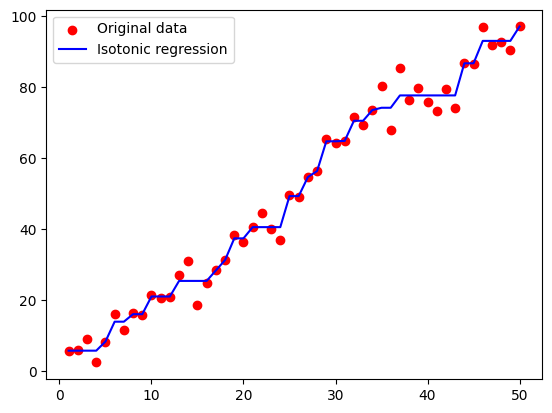

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

# Sample data
x = np.array([i for i in range(1,51)])
y = np.array([5.76, 5.85, 8.88, 2.39, 8.29, 16.13, 11.65, 16.36, 15.65, 21.36,
 20.65, 20.96, 27.12, 30.92, 18.61, 24.88, 28.34, 31.26, 38.32, 36.44,
 40.67, 44.39, 40.11, 37.01, 49.60, 48.99, 54.67, 56.35, 65.35, 64.13,
 64.86, 71.61, 69.45, 73.54, 80.40, 67.99, 85.27, 76.28, 79.64, 75.70,
 73.27, 79.45, 74.12, 86.81, 86.65, 96.99, 92.00, 92.70, 90.50, 97.11]
)

# Create an instance of IsotonicRegression and fit the model
iso_reg = IsotonicRegression(increasing=True)
y_iso = iso_reg.fit_transform(x, y)

# Print the results
print("Original y values:", y)
print("Isotonic y values:", y_iso)

# Plot the results
plt.scatter(x, y, label="Original data", color="red")
plt.plot(x, y_iso, label="Isotonic regression", color="blue")
plt.legend()
plt.show()


In [8]:
ans = [1]*5
ans.extend([2]*5)
ans

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2]